<a href="https://colab.research.google.com/github/abdulwasaeee/Decision-Trees/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



In [3]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
x=pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [6]:
y=dataset['target']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


<Axes: >

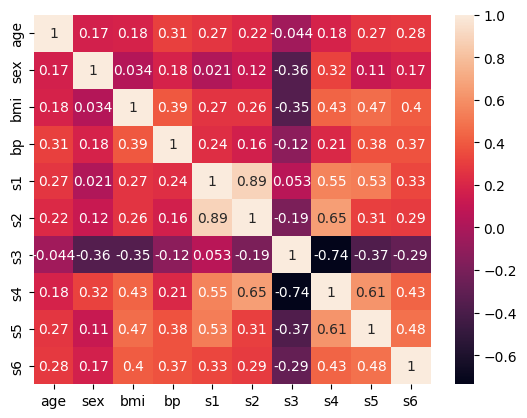

In [8]:
sns.heatmap(x_train.corr(),annot=True)

In [9]:
param={
    'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
    'splitter': ['best', 'random'],
    'max_depth':[1,2,3,4,5,15,20,25],
    'max_features':['auto','sqrt','log2']

}

In [14]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
grid=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param,cv=5,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [11]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [12]:
seldt=DecisionTreeRegressor(criterion='friedman_mse', max_depth = 2,max_features= 'sqrt',splitter= 'best')
seldt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='sqrt')

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.024\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.5, 'x[2] <= -0.0\nfriedman_mse = 4485.234\nsamples = 242\nvalue = 131.26'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 2398.888\nsamples = 158\nvalue = 106.101'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 4979.481\nsamples = 84\nvalue = 178.583'),
 Text(0.75, 0.5, 'x[8] <= 0.017\nfriedman_mse = 6042.824\nsamples = 111\nvalue = 202.739'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 7178.05\nsamples = 50\nvalue = 166.48'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 3151.396\nsamples = 61\nvalue = 232.459')]

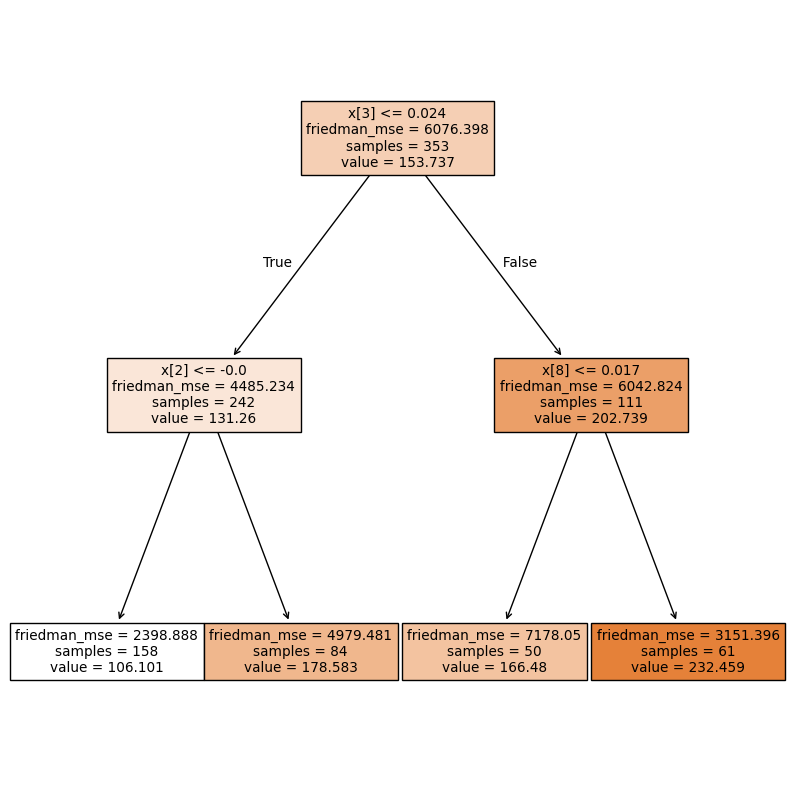

In [13]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(seldt,filled=True)